# 1. házi feladat

Az első házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a PyTorch könyvtár segítségével.

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik és vizsgálja az egyes részfeladatokra adott megoldások helyességét. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni! A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, _vélhetően_ jó a megoldás. Azonban, a tesztelőszkript nem képes a megoldás helyességét minden aspektus szerint ellenőrizni. Így elképzelhető, hogy beadás után további javításokat kérünk a megoldásban. A beadott házi feladatok gépi tanulás alapú plágiumellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén javasolt átnézni a Canvason megosztott segédanyag notebookokat és videókat, illetve az előadások anyagát. A Canvas fórumon "HF1 GYIK" névvel, a gyakori kérdéseket és válaszokat gyűjtjük össze. Továbbá, kérhető segítség az oktatóktól is, például a Teams rendszeren keresztül. Ehhez, kérjük a kurzus Canvas oldalán a legfelső modulban található _"
Teams beszélgetés indítása az oktatókkal"_ linket használni: ez egy Teams beszélgetést kezdeményez az összes oktatóval egyidejűleg.

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Jupyter notebook a Google Drive-on keresztül lett megosztva, így a Google saját Jupyter notebook szerkesztője és futtatókörnyezete nyílik meg a linkre kattintáskor, a Google Colab. Ennek segítségével online szerkeszthető és futtatható a megosztott notebook. Mivel a notebook csak "view" jogosultságokkal van megosztva, a Google Colab az úgynevezett "Playground" módban nyitja azt meg, ahol bár szerkeszthető és futtatható a notebook, de a változtatások nem lesznek automatikusan mentve. A notebook maradandó hatásokkal járó szerkesztése az alábbi módokon lehetséges:
- Javasolt a notebook-ot letölteni (.ipynb fájl) és a saját számítógépen telepített Python környezettel, `jupyterlab`, vagy `notebook` csomagok segítségével használni, hiszen a ZH alatt is ilyen környezettel kell majd dolgozni. További információk erről a környezetről a "Szoftveres anyag - Python környezet infók" videóban találhatók, Canvason. A szükséges csomagok telepítéséhez felhasználható a Canvas-ban, a "ZH Python környezet (requirements.txt)" link alatt lévő fájl is.
- Ha online szeretnénk a notebookot szerkeszteni és futtatni a Google Colab segítségével, akkor le kell másolni azt a saját Drive tárhelyre (Google Colab file menü -> Save a copy to Drive), majd a másolatot kell megnyitni szerkesztésre. Az így készült megoldás letölthető és beadható. A ZH alatt azonban a Google Colab nem lesz elérhető.

A kész megoldást tartalmazó notebookot (.ipynb) fájlként kell feltölteni a Canvas-ban, a házi feladat beadási felületén.
**Kérjük a notebook szerkezetét nem módosítani és nem szétszedni külön feladatok szerint!**

**Határidő:** 2025. április 3., csütörtök, 23:59.

**Késve legkésőbb leadható:** 2025. április 8., kedd, 23:59. - **Ezt követően pótlásra és/vagy javításra nincs lehetőség, ezáltal jegyszerzésre sem. !!!**

**Értékelés:** A házi feladat helyes megoldása és oktatók által történő elfogadása feltétele a jegyszerzésnek. A házi feladat minősége részletesen pontozásra nem kerül, az értékelése kétfokozatú: megfelelt / nem felelt meg. Az első határidőig leadott nagyrészt helyes és nagyrészt teljes ("megfelelt") megoldásért 5 pont jár. Késés esetén ez elveszik.

**Kikötés:** Ahol csak lehet, hatékony, vektorizált megoldásokat várunk. További részletekért lásd: Canvas, HF1 GYIK fórum, "Használhatók-e Python ciklusok?" bejegyzés.

Tesztelő szkript letöltése, importok.

In [ ]:
# Download tester
#!rm annbsc25_p1_hw1_tester.py                                                               # "!rm" might not work in all environments
#!wget nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc25_p1/files/annbsc25_p1_hw1_tester.py      # "!wget" might not work in all environments
                                                                                            #     when using offline Jupyterlab/notebook environment, download and place tester script next to the notebook file

import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from annbsc25_p1_hw1_tester import Tester

###**A**: Az adatbázis betöltése

**Információ az adatbázisról**:
Az adatbázis eredetije az UCI Machine Learning Repository-ról származik (http://archive.ics.uci.edu/ml/datasets/Student+Performance), mely kissé módosítva lett. Két portugál középiskolában tanuló diákok néhány adatát és a harmadév végi, év végi jegyeiket (0-20) tartalmazza. A házi feladat keretében, **neuronhálókkal próbálunk a diákok szociális és pénzügyi háttere alapján becsléseket adni az iskolai teljesítményükre.**

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó változók értékeit. A sorokban az egyes változókhoz tartozó értékek pontosvesszővel vannak elválasztva. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy **alakítsd át a `content` sztringet az adatbázis változóinak értékeit tartalmazó NumPy tömbbé.** A tömbök adattípusa np.float32 (lebegőpontos) legyen! A változók értékeit helyezd el a `dataset_noisy` (n_mintaelem, n_változó) alakú tömbben!  Az input változókat és címkéket később választjuk majd szét.

Az adatbázis helyenként hiányzó értékeket tartalmaz: az adatok egy része nem volt elérhető az adatbázis rögzítésekor. Konkrétabban, a szülők munkáját leíró és a tanuló gyámjának kilétére vonatkozó oszlopokban találhatók hiányzó értékek. Ezek a kilencedik (Mjob), tizedik (Fjob) és tizenkettedik (guardian) oszlopokban találhatók. Hiányzó értékek esetén a `content` sztringben ténylegesen is hiányoznak a megfelelő pontosvesszők közt elhelyezkedő értékek, tehát ilyenkor két (vagy több) pontosvessző következik egymás után.

A hiányzó értékeket kezelned kell és fel kell ismerned beolvasás közben: a hiányzó értékek helyére a `dataset_noisy` tömbben `np.nan` (Not-a-Number) értékek kell, hogy kerüljenek!

In [2]:
from annbsc25_p1_hw1_tester import Tester

tester = Tester()
content = tester.get_dataset_content()

print("Number of characters in dataset:", len(content))
print(content[:500])


Number of characters in dataset: 27418
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0;0;18;0;1;1;4;4;5;0;4;;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;14;15;15
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;6;6;7
0;0;15;0;0;0;1;1;5;;3;;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;7;7;8
0;0;15;0;1;0;4;2;1;4;0;;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15;15;15
0


In [3]:
# implement your solution BELOW

rows = content.strip().split('\n')
columns = rows[0].split(';')

data = []
for row in rows[1:]:
    values = row.split(';')
    cleaned_values = []
    for v in values:
        if v == '':
            cleaned_values.append(np.nan)
        else:
            try:
                cleaned_values.append(float(v))
            except ValueError:
                cleaned_values.append(np.nan)
    data.append(cleaned_values)
    
dataset_noisy = np.array(data, dtype=np.float32)

# implement your solution ABOVE

tester.test('dataset_load', dataset_noisy)

Tester: Dataset loading OK


## **B**: A hiányzó adat kezelése

NaN értékekkel nem fogunk tudni tovább dolgozni, hiszen a legtöbb NumPy/PyTorch művelet nem támogatja őket és bármilyen tömbre, melyben legalább egy NaN érték található, ezen műveletek kimenete is NaN lesz, így például a neuronhálónk becslése és költsége is. Utóbbi megakadályozza, hogy a hálót gradiens módszerrel optimalizáljuk. Éppen ezért, a hiányzó adatokat reprezentáló NaN értékeket az alábbi módon fogjuk eltüntetni:

**Hozz létre minden NaN értéket tartalmazó változóhoz egy-egy újabb változót, melyek azt jelzik, hogy valódi érték található-e az adott változóban az adott mintaelemnél, vagy nem!** Valódi érték esetén az új változó kapjon 1 értéket, NaN esetén pedig 0 értéket! Helyezd el az eredeti adatot és az új változókat a `dataset` tömbben: az új változók oszlopai kerüljenek megfelelő sorrendben az összes eredeti változót tartalmazó oszlop **után**! Az előző feladat leírásában említésre került, hogy melyik oszlopok tartalmazhatnak NaN értékeket.</br>
Mivel a 33 változós adatbázisunk #8, #9 és #11 indexű oszlopai (változói) tartalmazhatnak NaN értékeket, akkor az új `dataset` tömbünk 36 változós lesz és a három új változó az utolsó három oszlopba kerül. Például tehát, a #33 indexű oszlopban egy adott sorba nullás érték kerül, ha a #8-as oszlopban annál a sornál NaN található, egyébként pedig 1-es érték kerül oda. Hasonlóan készítjük el a #34, #35 indexű oszlopokat a #9 és #11 indexű oszlopok alapján.

Végül, **helyettesítsd** az így elkészült **tömb összes NaN értékét nullával!**


In [4]:
# implement your solution BELOW

nan_columns = [8, 9, 11]

nan_indicators = []
for col in nan_columns:
    indicator = np.where(np.isnan(dataset_noisy[:, col]),0,1)
    nan_indicators.append(indicator)
    
dataset_noisy = np.nan_to_num(dataset_noisy, nan=0.0)

nan_indicators = np.array(nan_indicators).T
dataset = np.hstack((dataset_noisy, nan_indicators)).astype(np.float32)


# implement your solution ABOVE

tester.test('dataset_fill_missing', dataset)

Tester: Dataset fill missing OK


## **C**: Tanító-, validációs- és teszthalmaz szétválasztása

**Keverd meg véletlenszerűen a mintaelemeket** a `dataset` tömbben! Ezt általánosságban azért célszerű megtenni, mert az adatbázisban az elemek valamilyen tulajdonságaik alapján rendezve lehetnek. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása.

Ezt követően **válaszd szét a tömböt tanító-, validációs- és teszthalmazra**, 50%, 25%, 25% arányban! A halmazokat tartalmazó három tömböt nevezd el `dataset_split_train`, `dataset_split_val`, `dataset_split_test`-nek, sorrendben!

In [5]:
# implement your solution BELOW

np.random.shuffle(dataset)

train_size = int(0.5 * len(dataset))
val_size = int(0.25 * len(dataset))
test_size = len(dataset) - train_size - val_size

dataset_split_train = dataset[:train_size]
dataset_split_val = dataset[train_size:train_size + val_size]
dataset_split_test = dataset[train_size + val_size:]

# implement your solution ABOVE

tester.test('dataset_split', dataset_split_train, dataset_split_val, dataset_split_test)

Tester: Dataset split OK


## **D**: Az adat-iterátorok létrehozása a regressziós feladathoz

A neuronhálók gradiens módszeres betanítását a legtöbbször iterátorokkal valósítjuk meg, melyek bejárják az adatbázisunkat és előállítják a neuronhálók tanításához szükséges input és címke kötegeket. A regressziós feladat során a becsülendő címkeváltozó a diákok év végi jegye lesz (`G3` nevű oszlop az eredeti adatbázis szövegfájlban - ez a 32-es indexű oszlop), míg az input változókat az összes többi attribútum adja, beleértve az újonnan előállított három változót is.

Ebben a részfeladatban **elő kell állítanod három iterátor objektumot** `dataloader_reg_train`, `dataloader_reg_val`, `dataloader_reg_test` néven, melyek az előző részfeladatban elkészített tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be. **Az iterátorok minden lépésben két tenzort adnak vissza**, melyek egy-egy kötegnyi input és címke adatot tárolnak el. A visszaadott tenzorok alakja tehát `(batch_size, 35)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok év végi jegyeit fogja tartalmazni, előbbi pedig az adatbázis összes többi változójának értékét a megfelelő mintaelemekre. `batch_size` a mintaelemek számát adja meg, melyeket egyszerre, egy kötegben fog megkapni a neuronhálónk - ennek értéke lehet például 32.

Hangsúlyozandó, hogy az iterátorok a fent említett NumPy tömbökből (`np.ndarray`) nyert mintaelem-kötegeket már `torch.tensor` típusú objektumokként adják vissza (pontosabban, kételemű tuple-öket adnak vissza, melyekben `torch.tensor` objektumok lesznek). A PyTorch-al definiált neuronhálók betanításához már mindenképp PyTorch tenzorok szükségesek. A tenzorok **adattípusa** 4 bájtos lebegőpontos típus (`torch.float32`) legyen!

A **tanító és validációs halmazt felsoroló iterátorok járják be véletlen sorrendben** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

Az iterátorok implementációja többféleképpen megoldható. Például, egyedi generátorral/iterátorral, vagy a `torch.utils.data` modul `Dataset` és `DataLoader` osztályai felhasználásával és esetleges származtatásával.

In [6]:
# implement your solution BELOW

class RegressionDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32).view(-1,1)
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.targets[index]
    
x_train = dataset_split_train[:, :-1]
y_train = dataset_split_train[:, 32]

x_val = dataset_split_val[:, :-1]
y_val = dataset_split_val[:, 32]

x_test = dataset_split_val[:, :-1]
y_test = dataset_split_val[:, 32]

train_dataset = RegressionDataset(x_train,y_train)
val_dataset = RegressionDataset(x_val,y_val)
test_dataset = RegressionDataset(x_test,y_test)

batch_size = 32

dataloader_reg_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_reg_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
dataloader_reg_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# implement your solution ABOVE

tester.test('reg_iter', dataloader_reg_train, dataloader_reg_val, dataloader_reg_test)

Tester: Dataset iterators for regression task OK


## **E**: A regressziós neuronháló definiálása

**Definiáld a regressziós feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely az általános `torch.nn.Module` osztály leszármazottja, majd példányosítsd azt és add értékül a `reg_model` nevű változónak a példányt!

A regressziós neuronháló **tartalmazzon 3 teljesen összekötött réteget, sorban 25, 25 és 1 neuronnal és alkalmazza a ReLU aktivációs függvényt a rétegek között!**

Az új osztálynak mindenképpen meg kell valósítania a `forward(self, x)` tagfüggvényt, mely a neuronhálót (hipotézisfüggvényt) az `x` input tenzorra kiértékeli. A `forward` függvény fogja majd az előbb definiált adat-iterátorból érkező input tenzorokat megkapni és előállítani belőle a címkebecsléseket. Az osztály konstruktorában célszerű a neuronhálónk rétegeit inicializálni.

In [7]:
# implement your solution BELOW

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        
        self.fc1 = nn.Linear(35,25)
        self.fc2 = nn.Linear(25,25)
        self.fc3 = nn.Linear(25,1)
        
        self.relu = nn.ReLU()
    
    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

reg_model = RegressionModel()

# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Tester: Regression model architecture OK


## **F**: A háló betanítása regressziós feladatra

**Tanítsd be a** `reg_model` **neuronhálót** a tanítóhalmazon a `dataloader_reg_train` iterátor segítségével és alkalmazd a `dataloader_reg_val` iterátort a validációhoz! Az iterátorok egyetlen (akár véletlen sorrendben történő) végighaladása a tanító és validációs adathalmazokon határoz meg egy _epoch_-ot.

Alkalmazd a regressziókor szokásosan használt **"átlagos négyzetes eltérés" költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonok kirajzolásához használhatod például a `matplotlib` könyvtárat. Figyelj rá, hogy a grafikonon jól látszódjanak a görbék közti eltérések a tanítás végén is! Ha szükséges, beállíthatod ehhez kézzel, hogy az y tengely melyik részét mutassa a grafikon. **A grafikonon legyen jelmagyarázat** (legend), mely megmutatja, melyik görbe írja le a tanítási költséget és melyik a validációs költséget!

Azt, hogy a tanítás meddig tartson (az epoch-ok számát) megadhatod kézzel is, a validációs költség alakulása alapján: próbáld úgy megadni, hogy a neuronháló lehetőleg jól betanult legyen, de súlyos túltanulás még ne jelenjen meg!

A betanításhoz válassz egy gradiens módszer alapú **optimalizációs algoritmust** a `torch.optim` modulból (pl. `SGD`, `Adam`, `RMSprop`, stb.), majd válassz egy megfelelő **tanulási rátát** is!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_mse` változónak!

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_reg_test` iterátor segítségével) és **adj becslést a címkéjükre** az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket!** Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



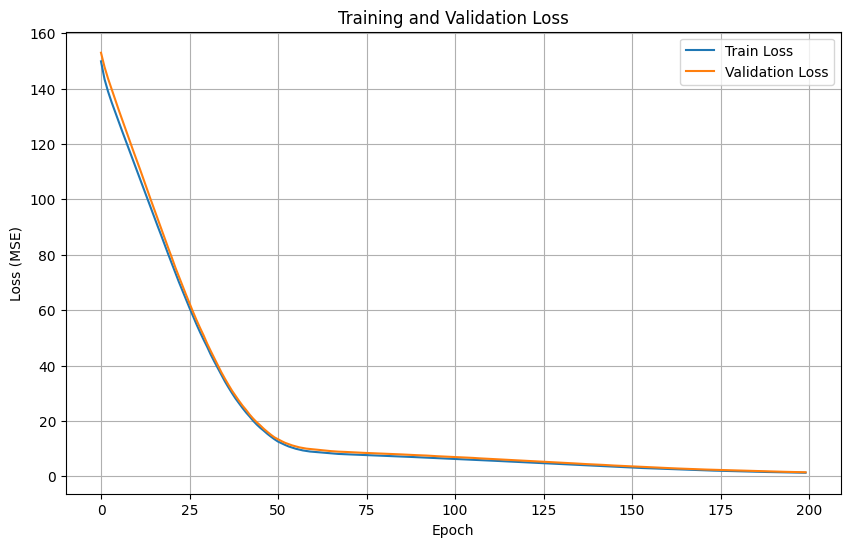


Average Test Loss (MSE): 1.4620
Tester: Regression model learning OK


In [8]:
# implement your solution BELOW
import torch.optim as optim

reg_model = RegressionModel()

learning_rate = 0.0001
num_epochs = 200

criterion = nn.MSELoss()
optimizer = optim.RMSprop(reg_model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    reg_model.train()
    train_loss = 0.0
    for inputs, labels in dataloader_reg_train:
        optimizer.zero_grad()
        outputs = reg_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(dataloader_reg_train.dataset)
    train_losses.append(train_loss)

    reg_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloader_reg_val:
            outputs = reg_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(dataloader_reg_val.dataset)
    val_losses.append(val_loss)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

reg_model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in dataloader_reg_test:
        outputs = reg_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

test_mse = test_loss / len(dataloader_reg_test.dataset)
print(f"\nAverage Test Loss (MSE): {test_mse:.4f}")

# implement your solution ABOVE
tester.test('reg_model_learning', test_mse)


## **G**: Az adat-iterátorok létrehozása a klasszifikációs feladathoz

Hasonlóan a D) feladathoz, itt is három adat-iterátort kell létrehoznunk, azonban ezúttal egy kissé eltérő feladatot fogunk megtanulni megoldani, így a visszaadott tenzorok alakja / adattípusa is eltérő lesz. **Állítsd elő** a `dataloader_cl_train`, `dataloader_cl_val`, `dataloader_cl_test` nevű **iterátorokat**, melyek ugyancsak a C) részfeladatban elkészült tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be! A klasszifikációs feladatban input változókként az összes változót felhasználjuk az adatbázisban, kivéve a három harmadév végi jegyét a diákoknak (`G1`, `G2`, `G3` nevű, #30, #31 és #32 indexű oszlopok az eredeti adatbázis szövegfájlban). Címkeként három kategóriát definiálunk és az összes diákot besoroljuk ezekbe a kategóriákba:
- **"Gyengén teljesítő diákok"** kategória, #0 kategóriaindex: azon diákok kerülnek ide, akiknek legalább két jegyük kisebb, mint 11.
- **"Közepesen teljesítő diákok"** kategória, #1 kategóriaindex: azon diákok kerülnek ide, akik átlagos jegye kisebb, mint 14, de nem tartoznak a "Gyengén teljesítő diákok" közé.
- **"Jól teljesítő diákok"** kategória, #2 kategóriaindex: azon diákok kerülnek ide, akik nem tartoznak a másik két kategóriába.

A fentiek alapján az iterátorok által visszaadott tenzorok alakja `(batch_size, 33)` és `(batch_size,)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok kategóriaindexét fogja tartalmazni (azaz 0, 1, vagy 2 értékeket, `torch.int64` adattípusban), előbbi pedig az adatbázis összes felhasznált változójának értékét a megfelelő mintaelemekre `torch.float32` adattípusban. `batch_size` ezúttal is a mintaelemek számát adja meg, ez kézzel beállítandó.

A **tanító és validációs halmazt felsoroló iterátorok véletlen sorrendben járják be** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

In [9]:
# implement your solution BELOW
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

def create_labels(data):
    labels = []
    for sample in data:
        g1, g2, g3 = sample[30], sample[31], sample[32]
        grades = [g1, g2, g3]
        
        if sum(grade < 11 for grade in grades) >= 2:
            labels.append(0)
        elif sum(grades) / 3 < 14:
            labels.append(1)
        else:
            labels.append(2)
    return torch.tensor(labels, dtype=torch.int64)

def prepare_inputs(data):
    inputs = torch.tensor(data[:, :33], dtype=torch.float32)
    return inputs

train_inputs = prepare_inputs(dataset_split_train)
train_labels = create_labels(dataset_split_train)
train_dataset = TensorDataset(train_inputs, train_labels)
dataloader_cl_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_inputs = prepare_inputs(dataset_split_val)
val_labels = create_labels(dataset_split_val)
val_dataset = TensorDataset(val_inputs, val_labels)
dataloader_cl_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

test_inputs = prepare_inputs(dataset_split_test)
test_labels = create_labels(dataset_split_test)
test_dataset = TensorDataset(test_inputs, test_labels)
dataloader_cl_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# implement your solution ABOVE

tester.test('cl_iter', dataloader_cl_train, dataloader_cl_val, dataloader_cl_test)

Tester: Dataset iterators for classification task OK


## **H**: A klasszifikációs neuronháló definiálása

**Definiáld a klasszifikációs feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely a regressziós neuronhálót implementáló osztályhoz hasonlóan, az általános `torch.nn.Module` osztály leszármazottja! Példányosítsd az új osztályt és add értékül a `cl_model` nevű változónak a példányt!

A klasszifikációs neuronháló **tartalmazzon 3 teljesen összekötött réteget! Az első kettő réteg tartalmazzon egyenként 30 és 20 neuront és alkalmazza a ReLU aktivációs függvényt a rétegek után!** Az utolsó réteget a háromkategóriás klasszifikációnak megfelelően kell kialakítani!

In [10]:
# implement your solution BELOW

class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(33, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
cl_model = ClassificationModel()

# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Tester: Classification model architecture OK


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

**Tanítsd be a** `cl_model` **neuronhálót** a tanítóhalmazon a `dataloader_cl_train` iterátor segítségével és alkalmazd a `dataloader_cl_val` iterátort a validációhoz!

Alkalmazd a multi-class klasszifikációkor szokásosan használt **cross-entropy költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonon a jelmagyarázat meglétére és a görbék könnyű elkülöníthetőségére figyelj ezúttal is!

A tanítást ezúttal az **early stopping** technika állítsa le! Amennyiben adott számú epoch-on keresztül (`patience`) nem javul a validációs költség, érjen véget a betanítás és **állítsuk vissza a `cl_model` súlyait abból az epoch-ból, amikor a legjobb volt a validációs költség!** Mindez automatikusan történjen!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_ce` változónak!

**Számold ki az _accuracy_ (pontosság) metrikát is a teszthalmaz elemein** és add értékül a kapott számot a `test_acc` változónak!! Az _accuracy_ metrika a helyesen klasszifikált mintaelemek arányát adja meg. Például, ha 150 mintaelem kategóriájának becslésekor 75 esetben találtuk el a helyes kategóriát, az _accuracy_ értéke 0.5 lesz.

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_cl_test` iterátor segítségével) és **adj becslést a címkéjükre** (a kategória indexére) az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket** (a kategóriák indexét)! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.

Végezetül, **számold ki a háló teszthalmazon vett konfúziós mátrixát és rajzold ki azt**! A konfúziós mátrix egy k x k méretű mátrix k kategória esetén, ahol az `[i,j]` indexű elem megadja, hogy az adathalmazon a modellünk hány `i` kategóriába tartozó mintaelemet becsült a `j` kategóriába. A modellünk jó teljesítményét jelzi, ha minél több elem kerül a konfúziós mátrix főátlójába. A számoláshoz felhasználhatsz külső könyvtárat is, de NumPy-ban is megoldható. A kirajzoláshoz használható például a `matplotlib.pyplot` csomag `imshow` függvénye. Figyelj rá, hogy a grafikonon világosan látszon, hogy melyik tengely sorolja fel az igazi kategóriákat és melyik a becsült kategóriákat, látszanak a sorok és oszlopok végén a kategóriák indexei és a cellákban az odatartozó mintaelemek darabszáma!


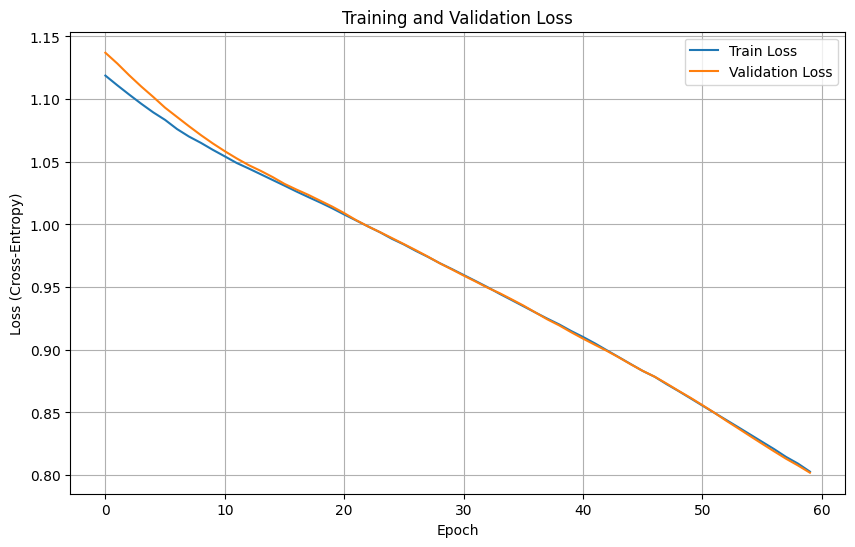


Average Test Loss (Cross-Entropy): 0.8839
Test Accuracy: 0.5800


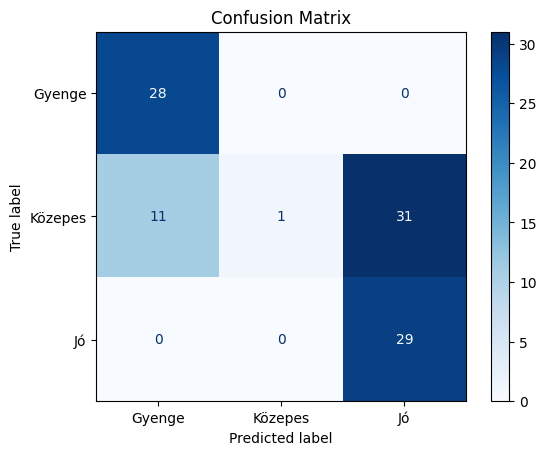

Tester: Classification model learning OK


In [11]:
# implement your solution BELOW
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cl_model = ClassificationModel()

learning_rate = 0.0001
num_epochs = 60
patience = 10

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(cl_model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_state = None

for epoch in range(num_epochs):
    cl_model.train()
    train_loss = 0.0
    for inputs, labels in dataloader_cl_train:
        optimizer.zero_grad()
        outputs = cl_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(dataloader_cl_train.dataset)
    train_losses.append(train_loss)

    cl_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloader_cl_val:
            outputs = cl_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(dataloader_cl_val.dataset)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = cl_model.state_dict()
        epochs_no_improve = 0
    elif epochs_no_improve >= patience:
        print(f"Early stopping at epoch {epoch}")
        break
    else:
        epochs_no_improve += 1
        
    
cl_model.load_state_dict(best_model_state)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross-Entropy)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

cl_model.eval()
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloader_cl_test:
        outputs = cl_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_ce = test_loss / len(dataloader_cl_test.dataset)
test_acc = correct / total
print(f"\nAverage Test Loss (Cross-Entropy): {test_ce:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Gyenge", "Közepes", "Jó"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc)
